In [1]:
import pandas as pd
from helpers import *

def run_and_graph(**kwargs):
    results = pd.DataFrame()

    for i in range(10000):
        game = init_game(**kwargs)
        sim(game)
        results = pd.concat((results, summarize(game, i)))
    
    outlier_threshold = results.balance.mean() + results.balance.std() * 2
    results = results[results.balance < outlier_threshold]
    binned = pd.cut(results.bets_made, bins=[0, 1] + list(range(5, 100, 5)))
    grouping = results.groupby(binned)
    grouping.balance.median().plot(kind='bar', yerr=1.385 * grouping.balance.std())

## The current game

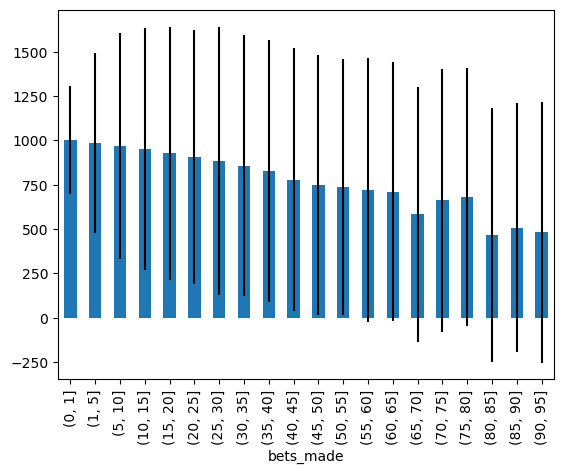

In [2]:
run_and_graph()

## With a $1 burn per offering not taken

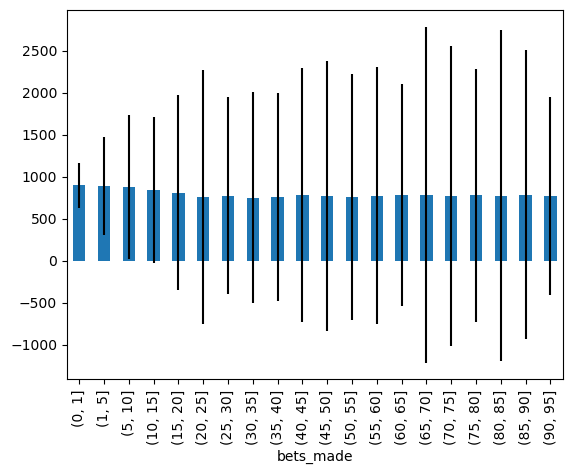

In [3]:
run_and_graph(burn=1)

## $5 burn

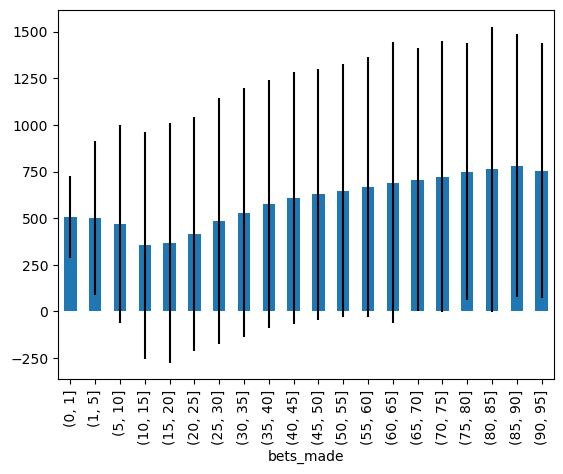

In [4]:
run_and_graph(burn=5)

## $10 burn

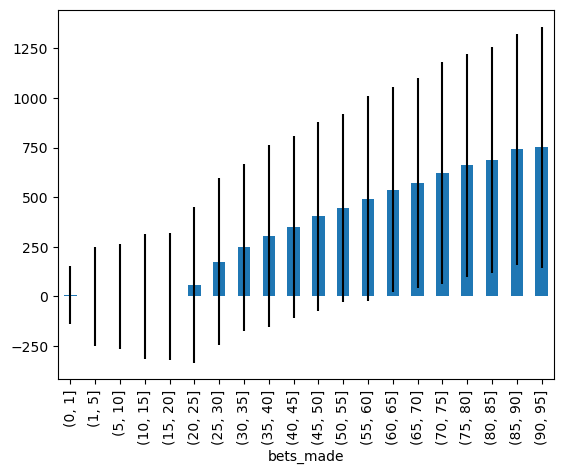

In [5]:
run_and_graph(burn=10)

## With a $100 minimum balance

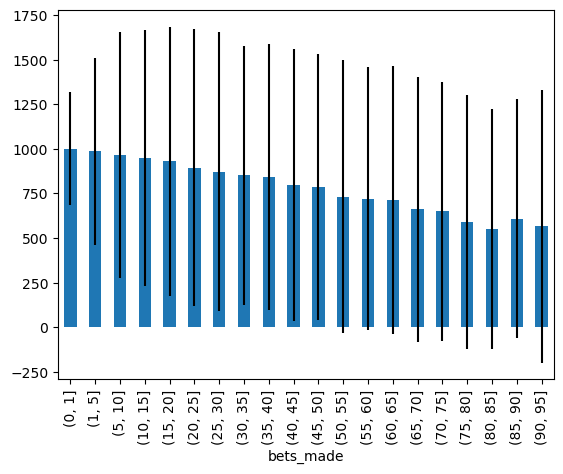

In [6]:
run_and_graph(minBalance=100)

## $500 minimum

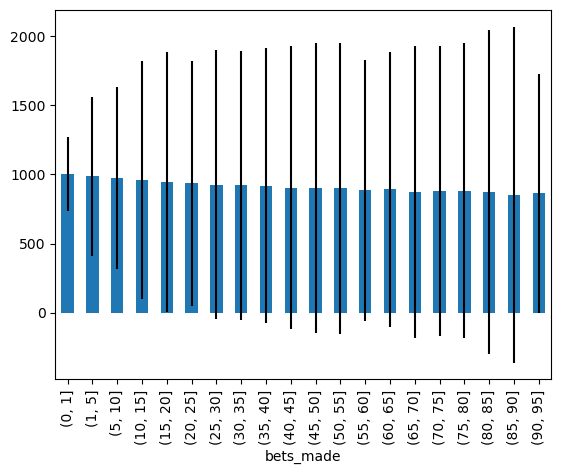

In [7]:
run_and_graph(minBalance=500)

## $900 minimum

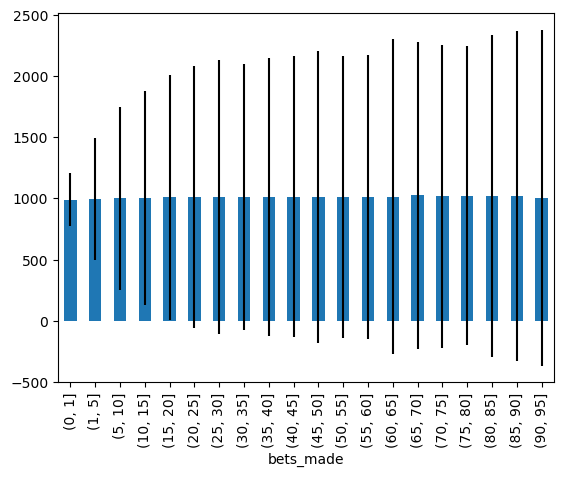

In [8]:
run_and_graph(minBalance=900)

## Throwing it all together...

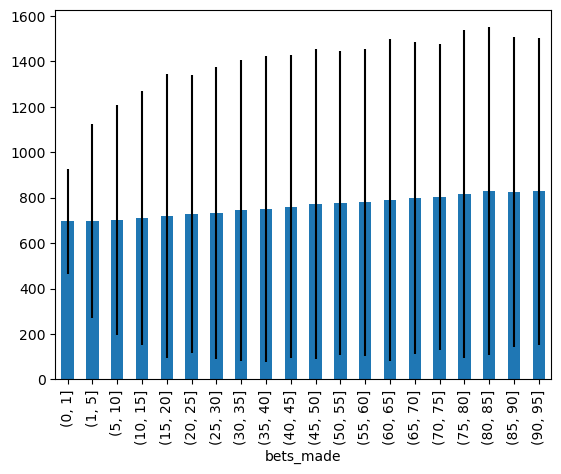

In [9]:
run_and_graph(minBalance=500, burn=3)